In [19]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix

In [20]:
#Importing the dataset 
df=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleaned.csv")
test=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleanedTest.csv")


In [21]:
#Drop the useless column
df.drop(['Unnamed: 0'], axis=1, inplace =True)
df.drop(['date'], axis=1, inplace =True)
df.drop(['DayName'], axis=1, inplace =True)

test.drop(['Unnamed: 0'], axis=1, inplace =True)
test.drop(['date'], axis=1, inplace =True)
test.drop(['DayName'], axis=1, inplace =True)

In [22]:
#preparing the two datasets splitting the attributes with the class 

selected_columns = ['CO2']

attributes = [col for col in df.columns if col != 'Occupancy']
X_train = df[selected_columns].values
y_train = df['Occupancy']

attributes = [col for col in test.columns if col != 'Occupancy']
X_test = test[selected_columns].values
y_test = test['Occupancy']

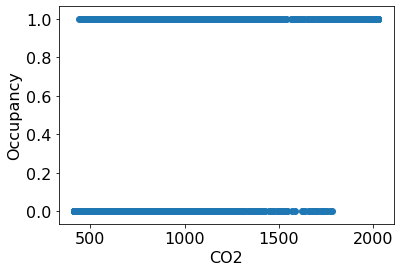

In [23]:
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [24]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy 0.8731707317073171
F1-score [0.9027618  0.81769148]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1693
           1       0.86      0.78      0.82       972

    accuracy                           0.87      2665
   macro avg       0.87      0.85      0.86      2665
weighted avg       0.87      0.87      0.87      2665



array([[1569,  124],
       [ 214,  758]])

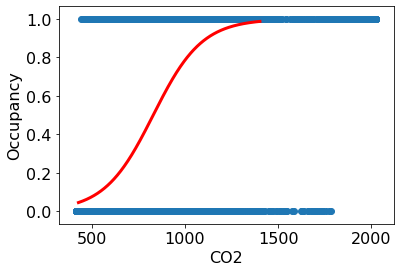

In [26]:
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

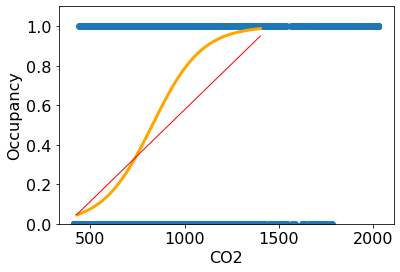

In [31]:
reg = LinearRegression()
reg.fit(X_train, y_train)

plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)

plt.plot(sorted(X_test), reg.coef_ * sorted(X_test) + reg.intercept_, color='red', linewidth=1)
plt.ylim([0.0, 1.1])

plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [10]:
#preparing the two datasets splitting the attributes with the class 
#FROM HERE WE HAVE THE REAL VALUE OF THE CALSSIFICATION
attributes = [col for col in df.columns if col != 'Occupancy']
X_trainT = df[attributes].values
y_trainT = df['Occupancy']

attributes = [col for col in test.columns if col != 'Occupancy']
X_testT = test[attributes].values
y_testT = test['Occupancy']

In [11]:
clf = LogisticRegression(random_state=0)
clf.fit(X_trainT, y_trainT)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_predT = clf.predict(X_testT)
y_predTP = clf.predict_proba(X_testT)
print('Accuracy %s' % accuracy_score(y_testT, y_predT))
print('F1-score %s' % f1_score(y_testT, y_predT, average=None))
print(classification_report(y_testT, y_predT))
confusion_matrix(y_testT, y_predT)

Accuracy 0.9786116322701689
F1-score [0.98290855 0.97142857]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665



array([[1639,   54],
       [   3,  969]])

In [13]:
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [1783  882]]


In [14]:
#Print the roc value
lb = LabelBinarizer()
lb.fit(y_testT)
lb.classes_.tolist()
fpr, tpr, _ = roc_curve(y_testT, y_predT)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_pred, average=None)

0.9825087688594285


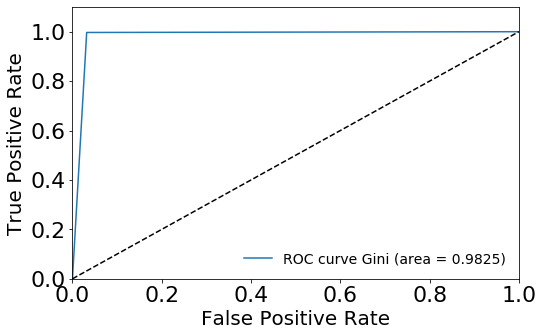

In [15]:
#Plotting the graph of the Roc curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve Gini (area = 0.9825)')
#plt.plot(fprE, tprE, label='ROC curve Gain (area = %0.5f)' % (roc_aucE))
#plt.plot(fprRF, tprRF, label='ROC curve Random Forest (area = %0.5f)' % (roc_aucRF))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

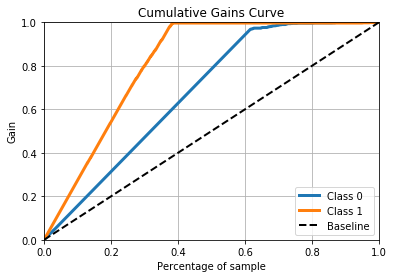

In [16]:
#Plotting the lift chart
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_testT, y_predTP)
plt.show()

In [17]:
attributes = [col for col in df.columns if col != 'Occupancy']
X_train = df[attributes]
y_train = df['Occupancy']

attributes = [col for col in test.columns if col != 'Occupancy']
X_test = test[attributes]
y_test = test['Occupancy']

In [18]:
features_combs_list = [
    ('IsWorkDay', 'Hour', 'IsWorkHour', 'Temperature', 'Humidity', 'Light', 'CO2'),
]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

hyper_params_space = [
    {
        'penalty': ['l1', 'l2'],
        'C': [1, 1.2, 1.5],
        'solver': ['liblinear', 'saga'],
        'tol': [1e-3, 1e-4]
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t1 = X_test.loc[:, features]
    
    logit = GridSearchCV(LogisticRegression(), hyper_params_space,
                        scoring='accuracy')
    logit.fit(X, y_train)

    print('Best parameters set:')
    print(logit.best_params_)
    print()
    
    preds = [
        (logit.predict(X), y_train, 'Train'),
        (logit.predict(X_t1), y_test, 'Test1')
    ]
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()

('IsWorkDay', 'Hour', 'IsWorkHour', 'Temperature', 'Humidity', 'Light', 'CO2')


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter wa

Best parameters set:
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}

Train Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6414
           1       0.95      0.99      0.97      1729

    accuracy                           0.99      8143
   macro avg       0.97      0.99      0.98      8143
weighted avg       0.99      0.99      0.99      8143


Train Confusion Matrix:
[[6324   90]
 [  10 1719]]

Test1 Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665


Test1 Confusion Matrix:
[[1639   54]
 [   3  969]]



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
